In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')
I_2011 = pd.read_table('BTC_2014.csv',delimiter =';')



In [42]:
I_2011

,Pred Year,Pred brent 2014,Pred FO 1% 2014,Pred FO 3.5% 2014,Pred Propane 2014,Pred Naphtha 2014,TD 2014,Actual 2014,MD 2014
0,2008,75.0,-13.96,-21.85,-25.16,-3.10,2.22,1.5,0.80
1,2009,71.0,-13.27,-18.76,-25.76,-3.48,2.33,1.5,0.95
2,2010,82.5,-8.44,-14.03,-30.05,-3.37,2.59,1.5,0.78
3,2011,100.0,1.37,-4.22,-29.88,6.42,2.24,1.5,1.30
4,2012,100.0,-6.84,-11.13,-38.59,-5.89,2.50,1.5,1.70
5,2013,100.0,-7.03,-12.15,-40.53,-8.43,2.30,1.5,1.50


In [43]:
import datetime
datetimes = [datetime.datetime.strptime(d, '%d.%m.%Y') for d in combi["Date"]]


df = pd.DataFrame(datetimes, columns=['date'])
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

combi = combi.assign(df=df['date'].values)
#print(combi)


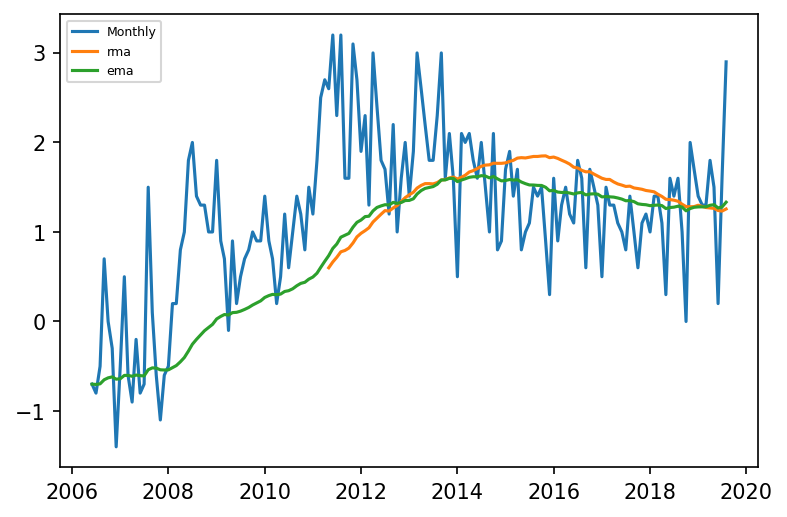

In [44]:
plt.rcParams['figure.dpi'] = 150

rma60 = combi["Azeri BTC"].rolling(window=60).mean()
ema60 = combi["Azeri BTC"].ewm(span=60, adjust=False).mean()
plt.plot(combi["df"],combi["Azeri BTC"])
plt.plot(combi["df"],rma60)
plt.plot(combi["df"],ema60)
plt.legend(("Monthly","rma","ema"))
plt.show()

combi = combi.assign(ema60=ema60.values)
combi = combi.assign(rma60=rma60.values)

In [45]:
take = 2014

In [46]:
if take==2011: 
    ema=[combi[combi['df']=='2005-01-01']['ema60'].values,combi[combi['df']=='2006-01-01']['ema60'].values   \
     ,combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values  \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values]
    
elif take==2012:
        ema=[combi[combi['df']=='2006-01-01']['ema60'].values,combi[combi['df']=='2007-01-01']['ema60'].values   \
     ,combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values  \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values]
    
elif take==2013:
    ema=[combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values   \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values  \
     ,combi[combi['df']=='2011-01-01']['ema60'].values,combi[combi['df']=='2012-01-01']['ema60'].values]
    
else:
    ema=[combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values   \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values  \
     ,combi[combi['df']=='2012-01-01']['ema60'].values,combi[combi['df']=='2013-01-01']['ema60'].values]
    
ema

[array([-0.54033706]),
 array([0.02814298]),
 array([0.26864026]),
 array([0.49661169]),
 array([1.13338382]),
 array([1.35249981])]

In [47]:
if take==2011: 
    rma=[combi[combi['df']=='2005-01-01']['rma60'].values,combi[combi['df']=='2006-01-01']['rma60'].values   \
     ,combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values  \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values]
    
elif take==2012:
        rma=[combi[combi['df']=='2006-01-01']['rma60'].values,combi[combi['df']=='2007-01-01']['rma60'].values   \
     ,combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values  \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values]
    
elif take==2013:
    rma=[combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values   \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values  \
     ,combi[combi['df']=='2011-01-01']['rma60'].values,combi[combi['df']=='2012-01-01']['rma60'].values]
    
else:
    rma=[combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values   \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values  \
     ,combi[combi['df']=='2012-01-01']['rma60'].values,combi[combi['df']=='2013-01-01']['rma60'].values]

rma

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([0.985]),
 array([1.415])]

In [48]:
combi=combi.fillna(0)

X = combi[['Dated Brent','Naphtha','Propane']]
Y = combi['Azeri BTC']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


DB= I_2011["Pred brent 2014"]
Na= I_2011["Pred Propane 2014"]
Po= I_2011["Pred Naphtha 2014"]

linear_BTC=regr.intercept_+ regr.coef_[0]*DB + regr.coef_[1]*Na + regr.coef_[2]*Po
print(linear_BTC)

Intercept: 
 -0.14242921745099235
Coefficients: 
 [ 0.00204873 -0.04288511 -0.0296611 ]
                            OLS Regression Results                            
Dep. Variable:              Azeri BTC   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     72.10
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           5.56e-33
Time:                        12:41:57   Log-Likelihood:                -240.36
No. Observations:                 236   AIC:                             488.7
Df Residuals:                     232   BIC:                             502.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
nonlinear_BTC = 2 - 0.0186675105114445*DB*np.exp(-7.82878945629328e-9*Po*Na*np.power(DB,3))


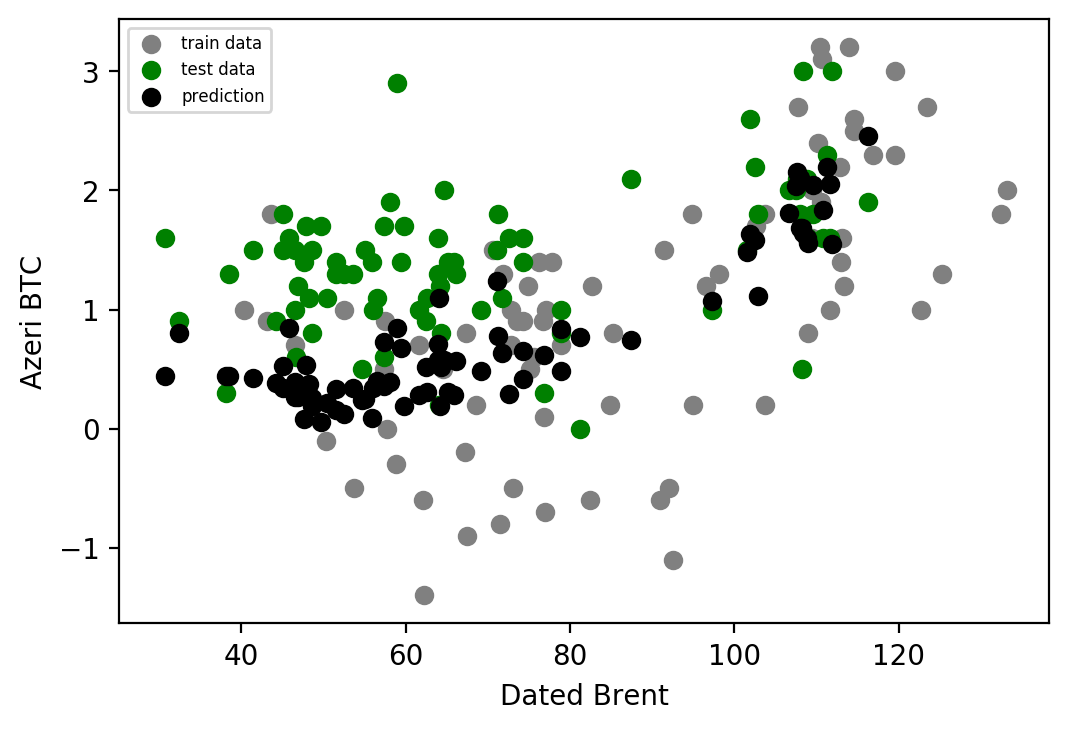

Mean squared error: 0.17
Feature ranking:
Feature Dated Brent (0.425404)
Feature Naphtha (0.265926)
Feature Propane (0.308671)


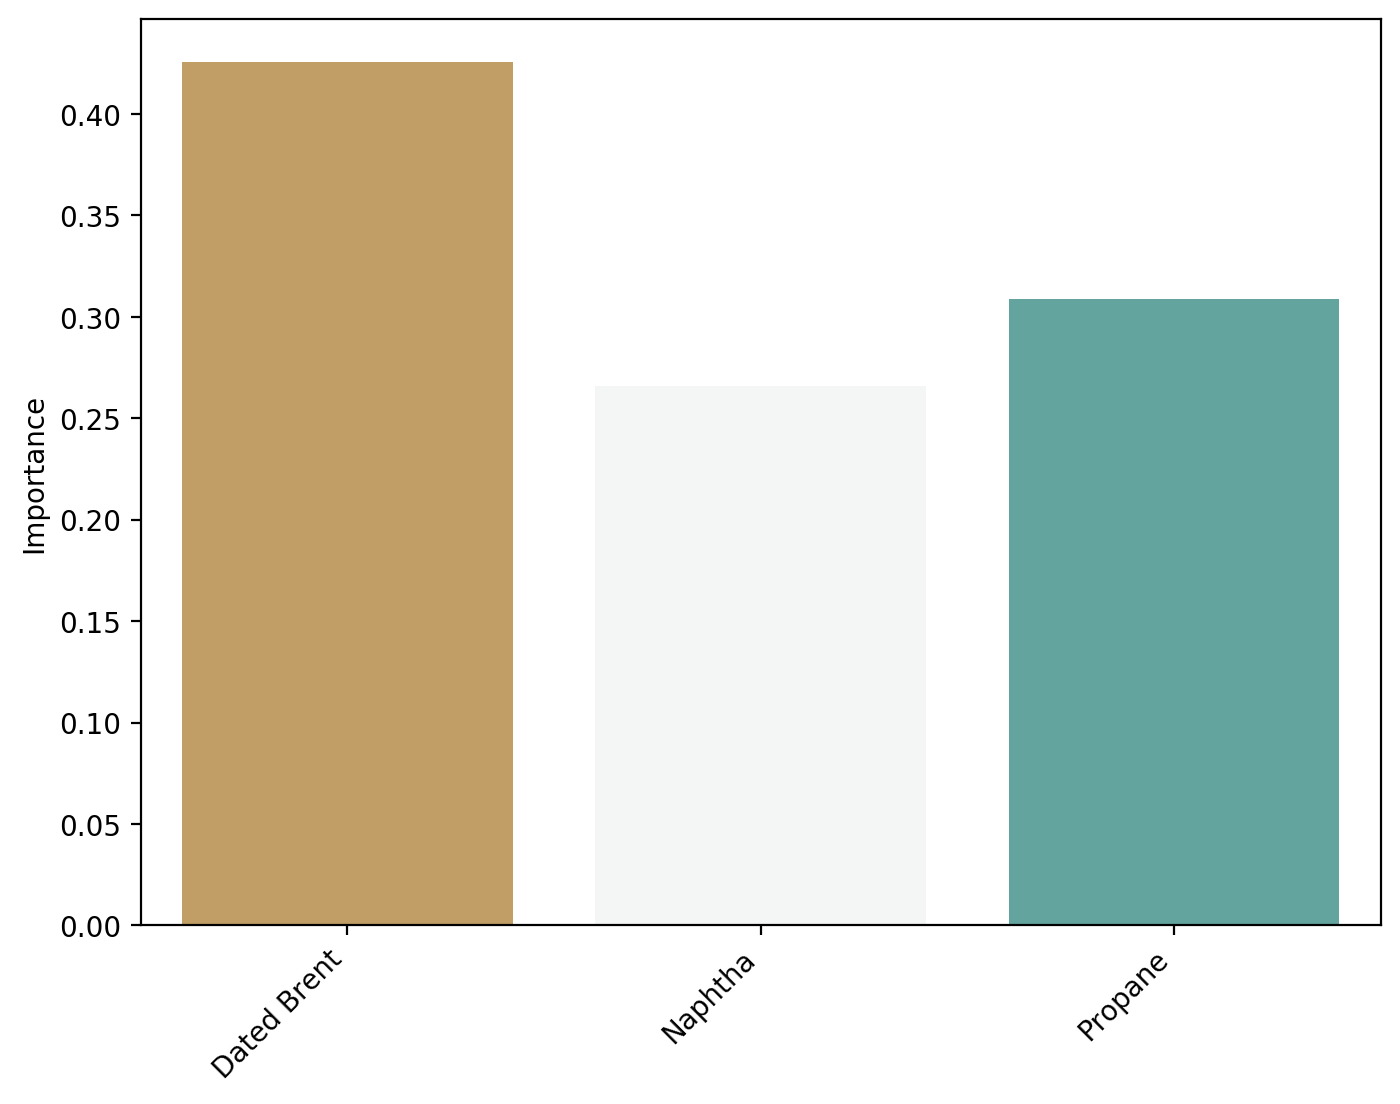

In [50]:
train_combi = combi.iloc[79:156,1:]
test_combi = combi.iloc[157:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dated Brent","Naphtha","Propane"]]
y_train=train_combi["Azeri BTC"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dated Brent","Naphtha","Propane"]]
y_test=test_combi["Azeri BTC"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dated Brent"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dated Brent"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dated Brent"], y_pred,  color='black')



plt.xlabel("Dated Brent")
plt.ylabel("Azeri BTC")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [51]:
#data_df = price[['Dated brent','FO 3.5%','FO 1%']]
data_df = pd.concat([DB,Na,Po],axis=1)
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

          0
0  1.383156
1  1.374728
2  1.385384
3  1.513546
4  1.528546
5  1.531546


MSE linear = 2.82
MSE non.linear = 1.66
MSE RF = 1.47


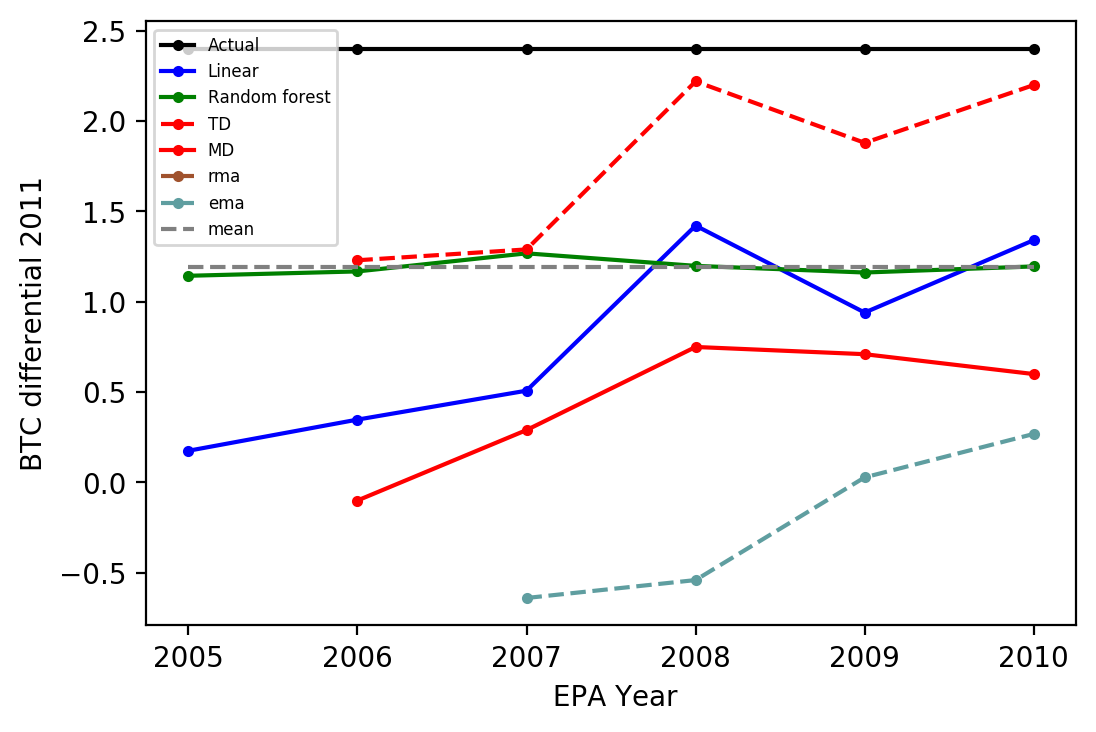

In [16]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2011"],'k.-')
plt.plot(I_2011["Pred Year"],linear_BTC,'b.-')
#plt.plot(I_2011["Pred Year"],nonlinear_BTC,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2011"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2011"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[1.19,1.19],'--',color='grey')
plt.xlabel(' EPA Year')
plt.ylabel('BTC differential 2011')
#plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))
plt.legend(("Actual","Linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2011"],linear_BTC)
mse_NL = mean_squared_error(I_2011["Actual 2011"],nonlinear_BTC)
mse_RF = mean_squared_error(I_2011["Actual 2011"],y_pred)


print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))



MSE linear = 0.88
MSE non.linear = 2.08
MSE RF = 0.30
MSE MD = 1.55


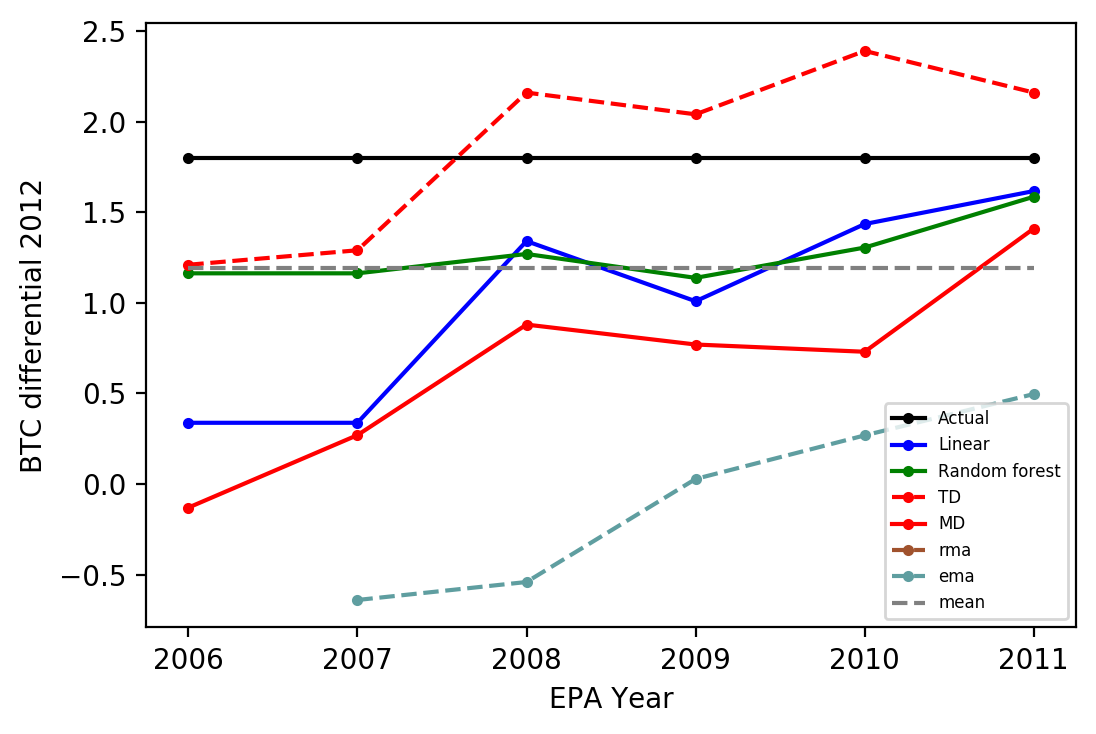

In [28]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2012"],'k.-')
plt.plot(I_2011["Pred Year"],linear_BTC,'b.-')
#plt.plot(I_2011["Pred Year"],nonlinear_BTC,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2012"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2012"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[1.19,1.19],'--',color='grey')
plt.xlabel('EPA Year')
plt.ylabel('BTC differential 2012')
#plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))
plt.legend(("Actual","Linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2012"],linear_BTC)
mse_NL = mean_squared_error(I_2011["Actual 2012"],nonlinear_BTC)
mse_RF = mean_squared_error(I_2011["Actual 2012"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2012"],I_2011["MD 2012"])


print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))


MSE linear = 0.93
MSE non.linear = 2.30
MSE RF = 0.59
MSE MD = 1.49


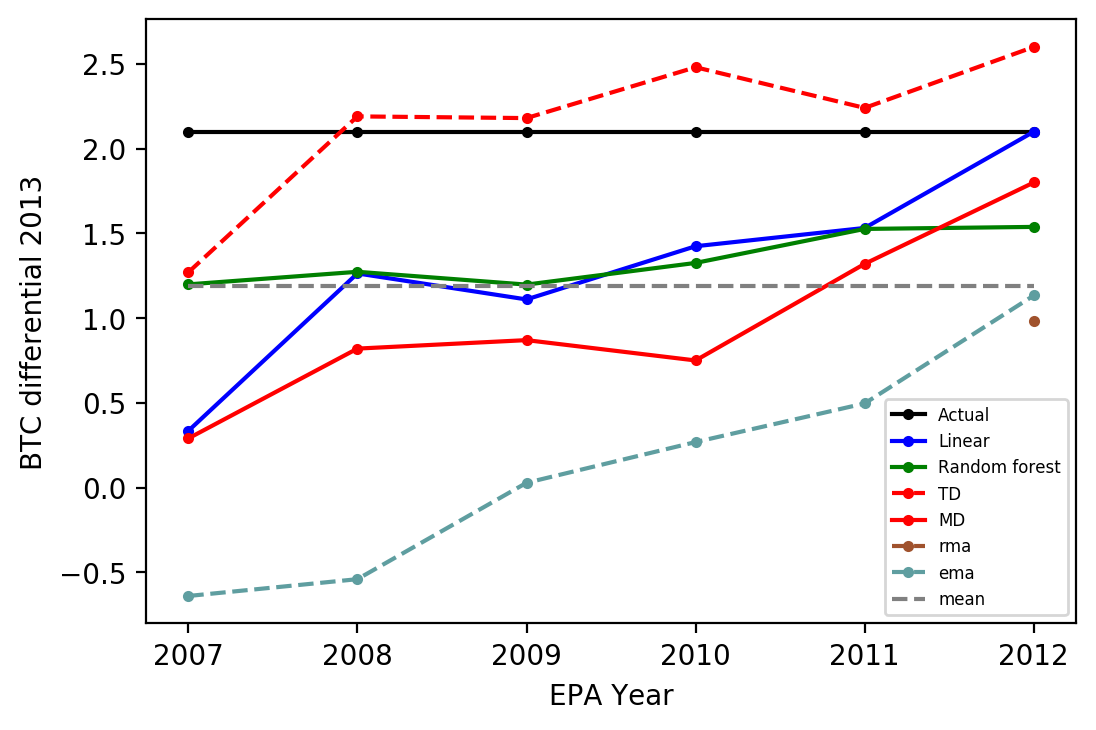

In [40]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2013"],'k.-')
plt.plot(I_2011["Pred Year"],linear_BTC,'b.-')
#plt.plot(I_2011["Pred Year"],nonlinear_BTC,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2013"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2013"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[1.19,1.19],'--',color='grey')
plt.xlabel('EPA Year')
plt.ylabel('BTC differential 2013')
#plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))
plt.legend(("Actual","Linear","Random forest","TD","MD","rma","ema","mean"))
from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2013"],linear_BTC)
mse_NL = mean_squared_error(I_2011["Actual 2013"],nonlinear_BTC)
mse_RF = mean_squared_error(I_2011["Actual 2013"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2013"],I_2011["MD 2013"])


print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))


MSE linear = 0.13
MSE non.linear = 10.52
MSE RF = 0.01
MSE MD = 0.23


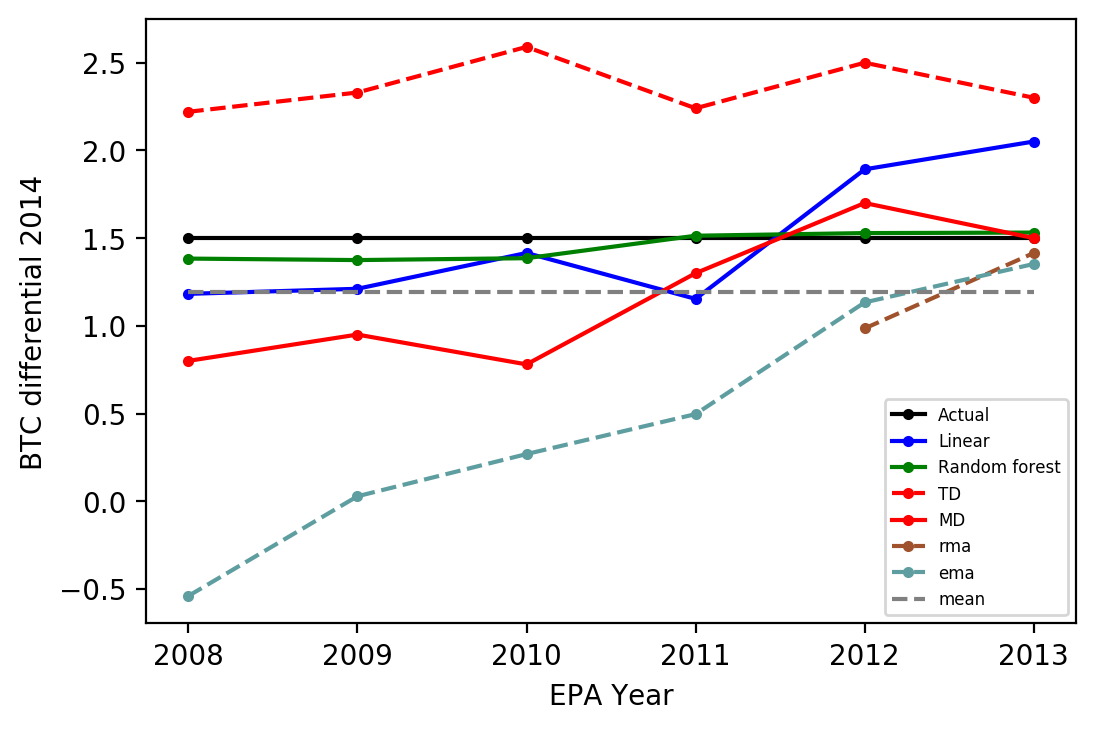

In [52]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2014"],'k.-')
plt.plot(I_2011["Pred Year"],linear_BTC,'b.-')
#plt.plot(I_2011["Pred Year"],nonlinear_BTC,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2014"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2014"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[1.19,1.19],'--',color='grey')
plt.xlabel('EPA Year')
plt.ylabel('BTC differential 2014')
#plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))
plt.legend(("Actual","Linear","Random forest","TD","MD","rma","ema","mean"))
from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2014"],linear_BTC)
mse_NL = mean_squared_error(I_2011["Actual 2014"],nonlinear_BTC)
mse_RF = mean_squared_error(I_2011["Actual 2014"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2014"],I_2011["MD 2014"])


print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))